# Introduction
This notebook performs queries on an Elasticsearch instance to analyze the sentiments of patient texts. We will perform several queries to explore the data and visualize the results.

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from elasticsearch_dsl import Search
from elasticsearch_dsl.connections import connections
from elasticsearch import Elasticsearch
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# Create a connection
connections.create_connection(hosts=['localhost'], timeout=60)

<Elasticsearch([{'host': 'localhost'}])>

# Query 1 - Distribution of sentiments for a patient's texts
We will perform a query to get the distribution of sentiments for a specific patient's texts.

In [43]:
# Initialize the search
s = Search(index="notes")

# Define the patient's first and last name
patient_firstname = "Alex"
patient_lastname = "Flynn"

# Add a query to filter on the patient's first and last name
s = s.query("match", patient_firstname=patient_firstname)
s = s.query("match", patient_lastname=patient_lastname)

# Execute the search
response = s.execute()

# Create a DataFrame from the hits
df = pd.DataFrame((d.to_dict() for d in s.scan()))

df


/home/thomas59/anaconda3/envs/machine-learning/lib/python3.10/site-packages/elasticsearch/connection/base.py:200: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  warnings.warn(message, category=ElasticsearchWarning)


,patient_firstname,patient_lastname,date,text,emotion,confidence
0,Alex,Flynn,2022-05-17,i couldn t know what he was feeling then i tho...,sadness,0.419988


/home/thomas59/anaconda3/envs/machine-learning/lib/python3.10/site-packages/elasticsearch/connection/base.py:200: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  warnings.warn(message, category=ElasticsearchWarning)


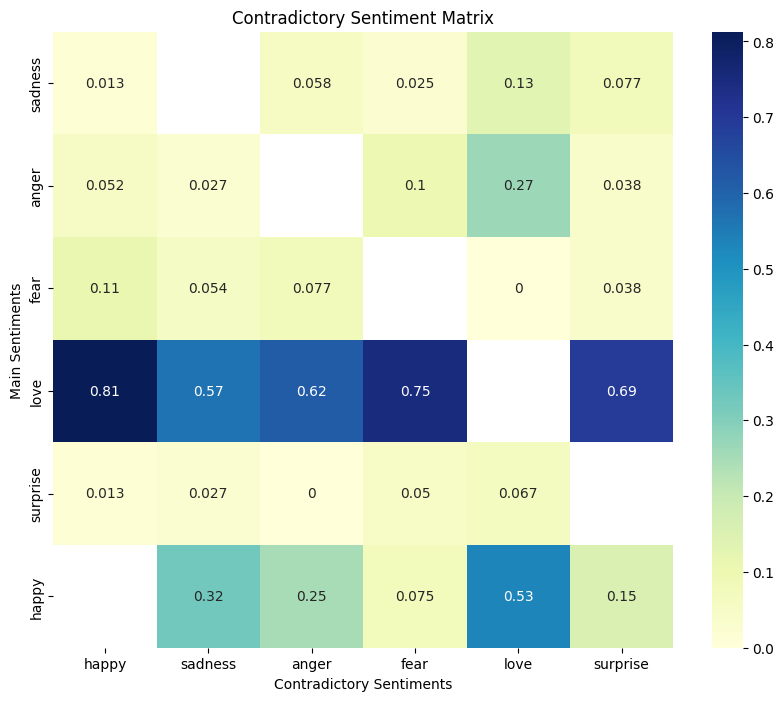